#Time Series Data Visualization And Analysis Techniques
---
In this Notebook we are going to see different data visualization techniques for time series analysis. we will also discuss the different tasks we can consider for a better understanding, exploration and anlysis, while working with time series datasets.

the dataset: Average daily temprature of different cities around globe from 1995 to 2020 


#### Agenda:
    Task1: Importing our dataset 
    Task2: Data Preprocessing
    Task3: Analysing global temperature from 1995 to 2019
    Task4: Comparing yearly average temperature of different regions over time
    Task5: Monthly average temperature in Canada

----

Importing modules

In [6]:
import pandas as pd 

import numpy as np 

import plotly.express as px 
import plotly.graph_objects as go
import matplotlib.pyplot as plt 

print("modules are imported!")

modules are imported!


Let's load our dataset

In [7]:
data = pd.read_csv("/content/Weather_Data(1995-2020).csv", low_memory = False)
data.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


The Dataset That we are going to work with is a ***Geo-Spatial Time-Series Dataset***

#### What is our dataset representing? 
**Geo-Spatial**: Data represents that **Something** has happend **somewhere**! <br>
**Time-Series**: Data represents that **Something** has happend **at a specific time**! <br>
<br>
**Geo-Spatial Time-Series Dataset**: Data represents that **Something** has happend **somewhere** **at a specific time**!


### Time Series tasks:
    1- Overall Trend analysis
    2- Key Moments
    3- Outliers

## Task 2: Preprocessing

#### Let's get only our needed columns

In [8]:
needed_columns = ["Region","Country","City","Month","Day","Year","AvgTemperature"]
data = data[needed_columns]
data.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9


Let's convert fahrenheit to celsius

In [9]:
data["AvgTemperature"] = round((data["AvgTemperature"] - 32) * 5/9, 1)
data.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,17.9
1,Africa,Algeria,Algiers,1,2,1995,9.7
2,Africa,Algeria,Algiers,1,3,1995,9.3
3,Africa,Algeria,Algiers,1,4,1995,8.0
4,Africa,Algeria,Algiers,1,5,1995,8.8


Let's find the outliers

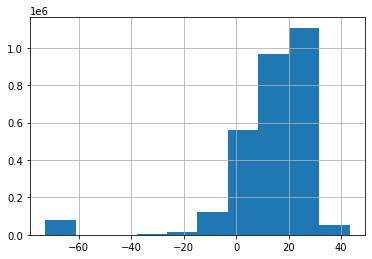

In [10]:
data["AvgTemperature"].hist()

Removing the outliers 

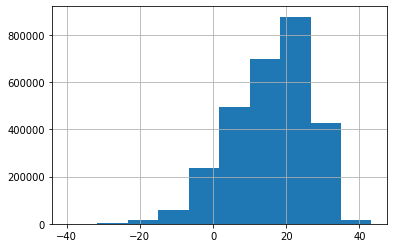

In [11]:
data = data[data.AvgTemperature > -40]
data["AvgTemperature"].hist()

sorting values by Year, Month and Day Column to see the time range of our data

In [13]:
data.sort_values(["Year", "Month", "Day"])

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,17.9
13809,Africa,Benin,Cotonou,1,1,1995,27.3
23075,Africa,Central African Republic,Bangui,1,1,1995,24.1
32341,Africa,Congo,Brazzaville,1,1,1995,26.6
41606,Africa,Egypt,Cairo,1,1,1995,15.1
...,...,...,...,...,...,...,...
2862479,North America,US,Green Bay,5,13,2020,3.6
2871744,North America,US,Madison,5,13,2020,7.6
2881009,North America,US,Milwaukee,5,13,2020,5.1
2890274,North America,US,Casper,5,13,2020,12.3


we don't have 2020 data completely, so let's just remove them from our dataset 

In [14]:
data = data[data.Year < 2020]
data.sort_values(["Year", "Month", "Day"])

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,17.9
13809,Africa,Benin,Cotonou,1,1,1995,27.3
23075,Africa,Central African Republic,Bangui,1,1,1995,24.1
32341,Africa,Congo,Brazzaville,1,1,1995,26.6
41606,Africa,Egypt,Cairo,1,1,1995,15.1
...,...,...,...,...,...,...,...
2862345,North America,US,Green Bay,12,31,2019,-2.4
2871610,North America,US,Madison,12,31,2019,-3.7
2880875,North America,US,Milwaukee,12,31,2019,-2.2
2890140,North America,US,Casper,12,31,2019,-7.6


## Task 3: Global temperature from 1995 to 2019 
    - Aggregating our data based on the year 
    - plot our data in a line chart 

In [15]:
data_agg = data[["Year", "AvgTemperature"]].groupby("Year").mean().reset_index()
data_agg.head()

,Year,AvgTemperature
0,1995,15.234645
1,1996,14.819832
2,1997,15.076760
3,1998,16.040177
4,1999,15.741267


Let's draw a line chart for this data

In [16]:
fig = px.line(data_agg, x = "Year", y = "AvgTemperature", title = "Global Average Temperature 1995 - 2019")
fig.update_xaxes(dtick = "Year")
fig.show()

### Time Series tasks:
    1- Overall Trend analysis
    2- Key Moments
    3- Outliers

### Overall Trend Analysis
Let's fit a linear line to our plot using numpy and Linear Regression 

In [17]:
coefs = np.polyfit(x = data_agg.Year, y = data_agg.AvgTemperature, deg = 1)

#y = mx + c

m = coefs[0]
c = coefs[1]

line = m*data_agg.Year + c
fig.add_trace(go.Scatter(x = data_agg.Year, y = line, name = "Trend Line"))
fig.show()

### Bar chart vs Line chart
Let's compare Bar chart and Line chart in terms of the tasks we can solve using each of them

Time Series tasks:

    1- Overall trend analysis
    2- Key Moments
    3- Outliers

Let's plot a bar chart for the same data

In [18]:
px.bar(data_agg, x = "Year", y = "AvgTemperature", color = "AvgTemperature")

### Task 4: Let's compare yearly average temperature of different regions over time 

In [19]:
data_regions = data[["Region", "Year", "AvgTemperature"]].groupby(["Region", "Year"]).mean().reset_index()
data_regions.head()
fig1 = px.line(data_regions, x = "Year", y = "AvgTemperature", color = "Region")
fig1.update_xaxes(dtick = "Year")
fig1.show()

### Task 5: Monthly average temperature in Canada

In [20]:
data

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,17.9
1,Africa,Algeria,Algiers,1,2,1995,9.7
2,Africa,Algeria,Algiers,1,3,1995,9.3
3,Africa,Algeria,Algiers,1,4,1995,8.0
4,Africa,Algeria,Algiers,1,5,1995,8.8
...,...,...,...,...,...,...,...
2906322,North America,US,San Juan Puerto Rico,7,27,2013,28.0
2906323,North America,US,San Juan Puerto Rico,7,28,2013,27.6
2906324,North America,US,San Juan Puerto Rico,7,29,2013,29.0
2906325,North America,US,San Juan Puerto Rico,7,30,2013,28.8


Creating a date column with this format ***MONTH/YEAR***

In [21]:
data_canada = data[data.Country == 'Canada'][["Month", "Year", "AvgTemperature"]]
data_canada = data_canada.groupby(["Month", "Year"]).mean().reset_index()
data_canada

,Month,Year,AvgTemperature
0,1,1995,-7.017419
1,1,1996,-12.089677
2,1,1997,-10.982581
3,1,1998,-8.588065
4,1,1999,-8.954000
...,...,...,...
295,12,2015,-4.191667
296,12,2016,-10.295161
297,12,2017,-10.885484
298,12,2018,-8.438710


Let's plot a bar chart to analyse this data

In [22]:
data_canada.Month = data_canada.Month.astype(str)
data_canada.Year = data_canada.Year.astype(str)

data_canada["Date"] = data_canada.Month + "/" + data_canada.Year
data_canada.head()

,Month,Year,AvgTemperature,Date
0,1,1995,-7.017419,1/1995
1,1,1996,-12.089677,1/1996
2,1,1997,-10.982581,1/1997
3,1,1998,-8.588065,1/1998
4,1,1999,-8.954000,1/1999


In [23]:
fig = px.bar(data_canada, x = "Date", y = "AvgTemperature", color = "Month")
fig.show()

### Let's use a Box Plot for analyzing the same data

In [24]:
px.box(data_canada, x = "Month", y = "AvgTemperature", color = "Month")